In [1]:
%pip install pandas --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
simulation_params = {
    'test-runs': 5,
    'num-hosts': 20,
    'num-rsu': 1,
    'num-jammer': 1
}

In [3]:
# Load the two CSV files into pandas dataframes
df_old = pd.read_csv('./interference/legacyResults.txt')
df_new = pd.read_csv('./interference/results.txt')
df_snr = pd.read_csv('./interference/snrResults.txt')

# Recalculate accuracy for both old and new solutions
df_new['accuracy'] = ((df_new['tp'] + df_new['tn']) / (df_new['tp'] + df_new['fp'] + df_new['tn'] + df_new['fn'])) * 100
df_old['accuracy'] = ((df_old['tp'] + df_old['tn']) / (df_old['tp'] + df_old['fp'] + df_old['tn'] + df_old['fn'])) * 100
df_snr['accuracy'] = ((df_snr['tp'] + df_snr['tn']) / (df_snr['tp'] + df_snr['fp'] + df_snr['tn'] + df_snr['fn'])) * 100

# Add a column to each dataframe to indicate the solution type
# Load the proactive CSV files into pandas dataframes
df_proactive_old = pd.read_csv('./static/proactiveLegacyResults.txt')
df_proactive_new = pd.read_csv('./static/proactiveResults.txt')
df_proactive_snr = pd.read_csv('./static/proactiveSnrResults.txt')

# Recalculate accuracy for both old and new solutions
df_proactive_new['accuracy'] = ((df_proactive_new['tp'] + df_proactive_new['tn']) / (df_proactive_new['tp'] + df_proactive_new['fp'] + df_proactive_new['tn'] + df_proactive_new['fn'])) * 100
df_proactive_old['accuracy'] = ((df_proactive_old['tp'] + df_proactive_old['tn']) / (df_proactive_old['tp'] + df_proactive_old['fp'] + df_proactive_old['tn'] + df_proactive_old['fn'])) * 100
df_proactive_snr['accuracy'] = ((df_proactive_snr['tp'] + df_proactive_snr['tn']) / (df_proactive_snr['tp'] + df_proactive_snr['fp'] + df_proactive_snr['tn'] + df_proactive_snr['fn'])) * 100

# Add a column to each dataframe to indicate the solution type and jammer type
df_proactive_old['Solution'] = 'Old Solution'
df_proactive_new['Solution'] = 'New Solution'
df_proactive_snr['Solution'] = 'SNR Solution'
df_proactive_old['jammerType'] = 'proactive'
df_proactive_new['jammerType'] = 'proactive'
df_proactive_snr['jammerType'] = 'proactive'

# Add jammerType to the original dataframes
df_old['jammerType'] = 'reactive'
df_new['jammerType'] = 'reactive'
df_snr['jammerType'] = 'reactive'

# Combine all the dataframes

df_old['Solution'] = 'Old Solution'
df_new['Solution'] = 'New Solution'
df_snr['Solution'] = 'SNR Solution'


# Combine the dataframes
df_combined = pd.concat([df_old, df_new, df_snr, df_proactive_old, df_proactive_new, df_proactive_snr])

num_runs = df_combined['runName'].nunique()
print(num_runs)
df_combined.head()

# Define the solution mapping
solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

# Apply the mapping to the combined dataframe
df_combined['Solution'] = df_combined['Solution'].map(solution_mapping)

print(num_runs)
df_combined.head()

30
30


,runName,time,JLE,tp,fp,tn,fn,accuracy,ttfd,vSpeed,jammerType,Solution
0,2675103601,4.0,80.32563,10,2,10,0,90.909091,4.0,30.0,reactive,NJS
1,2675103601,6.0,96.11296,10,3,9,0,86.363636,4.0,30.0,reactive,NJS
2,2675103601,8.0,110.37538,10,4,8,0,81.818182,4.0,30.0,reactive,NJS
3,2675103601,10.0,111.81134,8,5,7,2,68.181818,4.0,30.0,reactive,NJS
4,2675103601,12.0,111.81134,8,5,7,2,68.181818,4.0,30.0,reactive,NJS


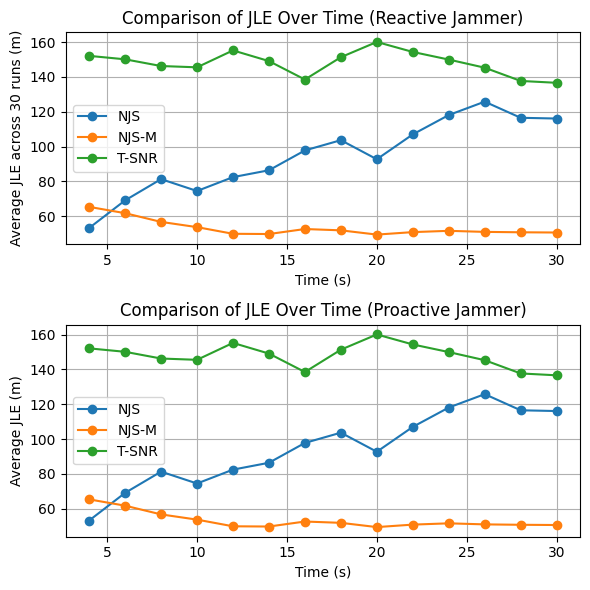

In [4]:
# Group by runName, time, Solution, and jammerType, and compute the mean JLE
df_grouped = df_combined.groupby(['runName', 'time', 'Solution', 'jammerType']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_pivot = df_grouped.pivot_table(values='JLE', index='time', columns=['Solution', 'jammerType'], aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 6))

# Plot for static jammer
plt.subplot(2, 1, 1)
plt.plot(df_pivot.index, df_pivot[('NJS', 'reactive')], label='NJS', marker='o')
plt.plot(df_pivot.index, df_pivot[('NJS-M', 'reactive')], label='NJS-M', marker='o')
plt.plot(df_pivot.index, df_pivot[('T-SNR', 'reactive')], label='T-SNR', marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Average JLE across {num_runs} runs (m)')
plt.title('Comparison of JLE Over Time (Reactive Jammer)')
plt.legend()
plt.grid(True)

# Plot for proactive jammer if it exists
if ('NJS', 'proactive') in df_pivot.columns and ('NJS-M', 'proactive') in df_pivot.columns and ('T-SNR', 'proactive') in df_pivot.columns:
    plt.subplot(2, 1, 2)
    plt.plot(df_pivot.index, df_pivot[('NJS', 'reactive')], label='NJS', marker='o')
    plt.plot(df_pivot.index, df_pivot[('NJS-M', 'reactive')], label='NJS-M', marker='o')
    plt.plot(df_pivot.index, df_pivot[('T-SNR', 'reactive')], label='T-SNR', marker='o')
    plt.xlabel('Time (s)')
    plt.ylabel(f'Average JLE (m)')
    plt.title('Comparison of JLE Over Time (Proactive Jammer)')
    plt.legend()
    plt.grid(True)
else:
    print("No proactive runs")

plt.tight_layout()
plt.show()

Average JLE for Jammer Type 'proactive':
Solution
NJS       98.361145
NJS-M     47.853693
T-SNR    134.248302
dtype: float64
Average JLE for Jammer Type 'reactive':
Solution
NJS       94.613385
NJS-M     53.266289
T-SNR    148.037287
dtype: float64


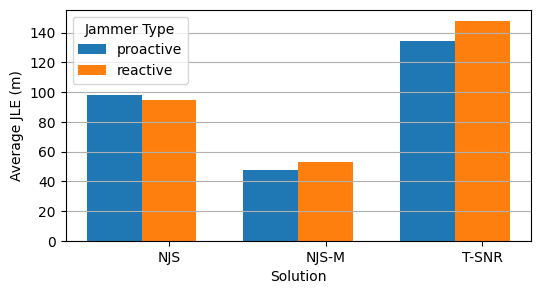

In [5]:
# Plot the bar chart using df_pivot
plt.figure(figsize=(6, 3))
bar_width = 0.35
index = range(len(df_pivot.columns.levels[0]))

# Plot bars for each jammer type
for i, jammerType in enumerate(df_pivot.columns.levels[1]):
    subset = df_pivot.xs(jammerType, level=1, axis=1)
    plt.bar([x + i * bar_width for x in index], subset.mean(), bar_width, label=jammerType)
    
    avg_JLE = subset.mean()
    
    # Print the average JLE for each jammer type and solution
    print(f"Average JLE for Jammer Type '{jammerType}':")
    print(avg_JLE)

# Add labels and title
plt.xlabel('Solution')
plt.ylabel('Average JLE (m)')
plt.xticks([x + bar_width for x in index], df_pivot.columns.levels[0])
plt.grid(True, axis='y')
plt.legend(title='Jammer Type')

# Show the plot
plt.show()


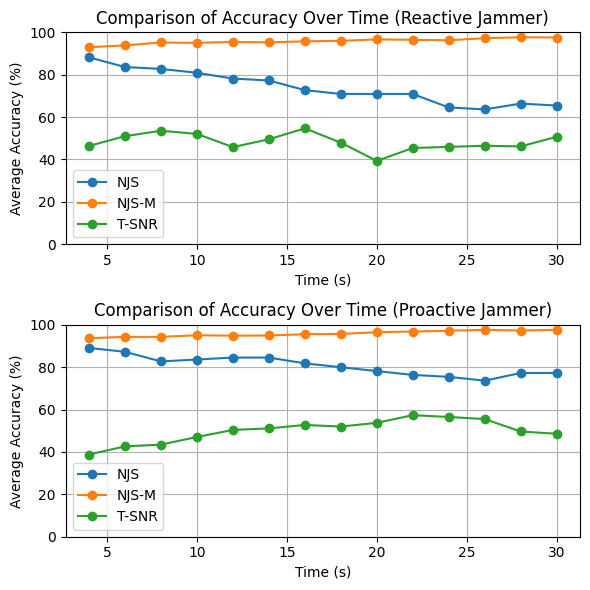

In [6]:
# Group by runName, time, Solution, and jammerType, and compute the mean accuracy
df_grouped = df_combined.groupby(['runName', 'time', 'Solution', 'jammerType']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_pivot = df_grouped.pivot_table(values='accuracy', index='time', columns=['Solution', 'jammerType'], aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 6))

# Plot for static jammer
plt.subplot(2, 1, 1)
plt.plot(df_pivot.index, df_pivot[('NJS', 'reactive')], label='NJS', marker='o')
plt.plot(df_pivot.index, df_pivot[('NJS-M', 'reactive')], label='NJS-M', marker='o')
plt.plot(df_pivot.index, df_pivot[('T-SNR', 'reactive')], label='T-SNR', marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Average Accuracy (%)')
plt.title('Comparison of Accuracy Over Time (Reactive Jammer)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)

# Plot for proactive jammer if it exists
if ('NJS', 'proactive') in df_pivot.columns and ('NJS-M', 'proactive') in df_pivot.columns and ('T-SNR', 'proactive') in df_pivot.columns:
    plt.subplot(2, 1, 2)
    plt.plot(df_pivot.index, df_pivot[('NJS', 'proactive')], label='NJS', marker='o')
    plt.plot(df_pivot.index, df_pivot[('NJS-M', 'proactive')], label='NJS-M', marker='o')
    plt.plot(df_pivot.index, df_pivot[('T-SNR', 'proactive')], label='T-SNR', marker='o')
    plt.xlabel('Time (s)')
    plt.ylabel(f'Average Accuracy (%)')
    plt.title('Comparison of Accuracy Over Time (Proactive Jammer)')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Average ACC for Jammer Type 'proactive':
Solution
NJS      80.844156
NJS-M    95.833068
T-SNR    49.976577
dtype: float64
Average ACC for Jammer Type 'reactive':
Solution
NJS      74.025974
NJS-M    95.812353
T-SNR    48.214159
dtype: float64


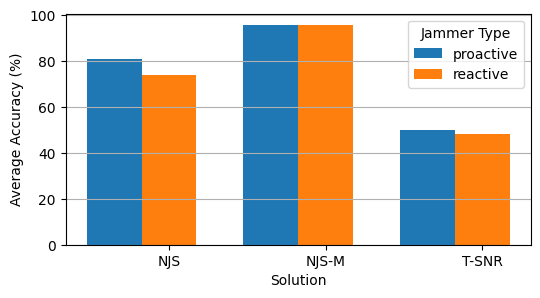

In [7]:
# Group by runName, time, Solution, and jammerType, and compute the mean accuracy
df_grouped = df_combined.groupby(['runName', 'time', 'Solution', 'jammerType']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_pivot = df_grouped.pivot_table(values='accuracy', index='time', columns=['Solution', 'jammerType'], aggfunc='mean')

# Plot the bar chart using df_pivot
plt.figure(figsize=(6, 3))
bar_width = 0.35
index = range(len(df_pivot.columns.levels[0]))

# Plot bars for each jammer type
for i, jammerType in enumerate(df_pivot.columns.levels[1]):
    subset = df_pivot.xs(jammerType, level=1, axis=1)
    plt.bar([x + i * bar_width for x in index], subset.mean(), bar_width, label=jammerType)
    
    avg_ACC = subset.mean()
    
    # Print the average JLE for each jammer type and solution
    print(f"Average ACC for Jammer Type '{jammerType}':")
    print(avg_ACC)

# Add labels and title
plt.xlabel('Solution')
plt.ylabel('Average Accuracy (%)')
plt.xticks([x + bar_width for x in index], df_pivot.columns.levels[0])
plt.grid(True, axis='y')
plt.legend(title='Jammer Type')

# Show the plot
plt.show()

In [8]:
# Load the two CSV files into pandas dataframes
df_dynamic_old = pd.read_csv('./dynamic/legacyResults.txt')
df_dynamic_new = pd.read_csv('./dynamic/results.txt')
df_dynamic_snr = pd.read_csv('./dynamic/snrResults.txt')

# Recalculate accuracy for both old and new solutions
df_dynamic_new['accuracy'] = ((df_dynamic_new['tp'] + df_dynamic_new['tn']) / (df_dynamic_new['tp'] + df_dynamic_new['fp'] + df_dynamic_new['tn'] + df_dynamic_new['fn'])) * 100
df_dynamic_old['accuracy'] = ((df_dynamic_old['tp'] + df_dynamic_old['tn']) / (df_dynamic_old['tp'] + df_dynamic_old['fp'] + df_dynamic_old['tn'] + df_dynamic_old['fn'])) * 100
df_dynamic_snr['accuracy'] = ((df_dynamic_snr['tp'] + df_dynamic_snr['tn']) / (df_dynamic_snr['tp'] + df_dynamic_snr['fp'] + df_dynamic_snr['tn'] + df_dynamic_snr['fn'])) * 100

# Add a column to each dataframe to indicate the solution type
df_dynamic_old['Solution'] = 'Old Solution'
df_dynamic_new['Solution'] = 'New Solution'
df_dynamic_snr['Solution'] = 'SNR Solution'

# Combine the dataframes
df_dynamic_combined = pd.concat([df_dynamic_old, df_dynamic_new, df_dynamic_snr])

df_dynamic_combined.head()

,runName,time,JLE,tp,fp,tn,fn,accuracy,ttfd,Solution
0,58289758,4.0,107.01250,4,1,16,1,90.909091,4.0,Old Solution
1,58289758,6.0,159.49135,3,1,17,1,90.909091,4.0,Old Solution
2,58289758,8.0,224.36087,1,1,18,2,86.363636,4.0,Old Solution
3,58289758,10.0,451.95097,0,1,19,2,86.363636,4.0,Old Solution
4,58289758,12.0,192.88318,1,1,17,3,81.818182,4.0,Old Solution


In [9]:
# Check if the 'jle' column exists, then calculate the average JLE by Solution name
if 'JLE' in df_dynamic_combined.columns:
    # Calculate the average JLE grouped by Solution
    avg_jle_by_solution = df_dynamic_combined.groupby('Solution')['JLE'].mean().reset_index()

    # Display the results
    print(avg_jle_by_solution)
else:
    print("The 'JLE' column is not present in the dataset.")


       Solution         JLE
0  New Solution   98.191983
1  Old Solution  117.821440
2  SNR Solution  186.057902


In [10]:
# Check if the 'accuracy' column exists, then calculate the average JLE by Solution name
if 'accuracy' in df_dynamic_combined.columns:
    # Calculate the average JLE grouped by Solution
    avg_jle_by_solution = df_dynamic_combined.groupby('Solution')['accuracy'].mean().reset_index()

    # Display the results
    print(avg_jle_by_solution)
else:
    print("The 'accuracy' column is not present in the dataset.")

       Solution   accuracy
0  New Solution  89.180368
1  Old Solution  77.124304
2  SNR Solution  35.881797


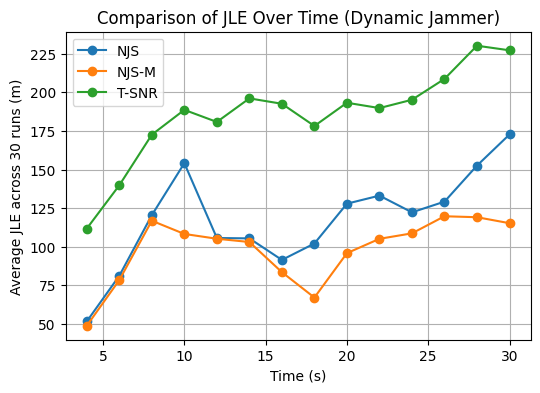

In [11]:
# Group by runName, time, and Solution, and compute the mean JLE
df_dynamic_grouped = df_dynamic_combined.groupby(['runName', 'time', 'Solution']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_dynamic_pivot = df_dynamic_grouped.pivot_table(values='JLE', index='time', columns='Solution', aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 4))
plt.plot(df_dynamic_pivot.index, df_dynamic_pivot['Old Solution'], label='NJS', marker='o')
plt.plot(df_dynamic_pivot.index, df_dynamic_pivot['New Solution'], label='NJS-M', marker='o')
plt.plot(df_dynamic_pivot.index, df_dynamic_pivot['SNR Solution'], label='T-SNR', marker='o')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel(f'Average JLE across {num_runs} runs (m)')
plt.title('Comparison of JLE Over Time (Dynamic Jammer)')
plt.legend()
plt.grid(True)
plt.show()


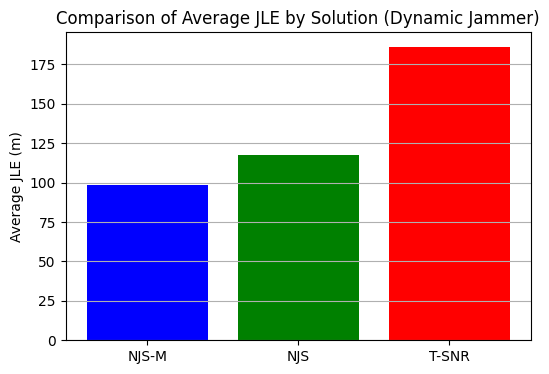

In [12]:
# Map 'Solution' values to 'NJS' and 'NJS-M'
solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

# Group by Solution and compute the mean JLE
df_solution_grouped = df_dynamic_combined.groupby('Solution').mean().reset_index()

# Replace 'Solution' values with the mapped names
df_solution_grouped['Solution'] = df_solution_grouped['Solution'].map(solution_mapping)

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(df_solution_grouped['Solution'], df_solution_grouped['JLE'], color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Average JLE (m)')
plt.title('Comparison of Average JLE by Solution (Dynamic Jammer)')
plt.grid(True, axis='y')

# Show the plot
plt.show()

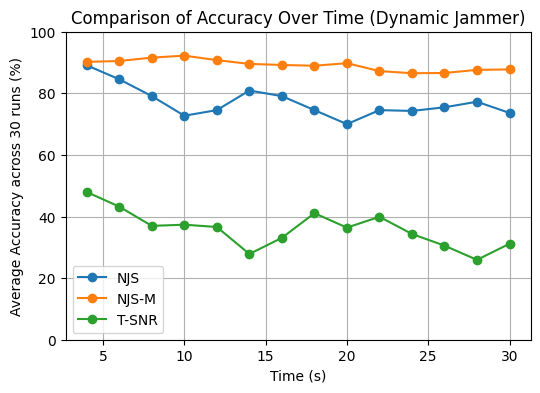

In [13]:
# Assuming df_old and df_new have the recalculated accuracy as per your formula

# Combine the dataframes, adding the 'Solution' column as before
df_dynamic_combined = pd.concat([df_dynamic_old, df_dynamic_new, df_dynamic_snr])

# Group by runName, time, and Solution, and compute the mean accuracy
df_dynamic_grouped = df_dynamic_combined.groupby(['runName', 'time', 'Solution']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_dynamic_pivot = df_dynamic_grouped.pivot_table(values='accuracy', index='time', columns='Solution', aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 4))
plt.plot(df_pivot.index, df_dynamic_pivot['Old Solution'], label='NJS', marker='o')
plt.plot(df_pivot.index, df_dynamic_pivot['New Solution'], label='NJS-M', marker='o')
plt.plot(df_dynamic_pivot.index, df_dynamic_pivot['SNR Solution'], label='T-SNR', marker='o')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel(f'Average Accuracy across {num_runs} runs (%)')
plt.title('Comparison of Accuracy Over Time (Dynamic Jammer)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

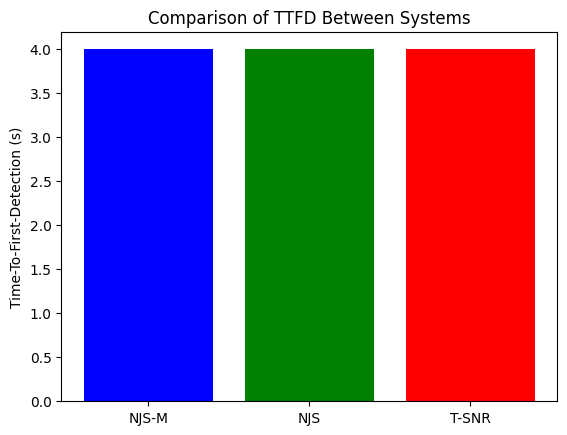

In [14]:
# Data for the bar chart
categories = ['NJS-M', 'NJS', 'T-SNR']
values = [4, 4, 4]

# Create the bar chart
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Time-To-First-Detection (s)')
plt.title('Comparison of TTFD Between Systems')

# Display the chart
plt.show()


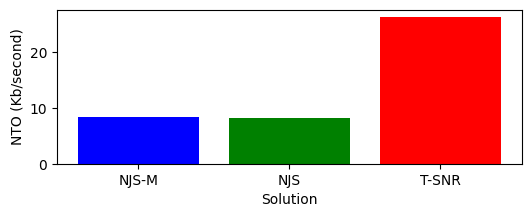

In [24]:
# Data for the bar chart
categories = ['NJS-M', 'NJS', 'T-SNR']
values = [8.286, 8.268, 26.286]

plt.figure(figsize=(6, 2))
# Create the bar chart
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('NTO (Kb/second)')
plt.xlabel('Solution')

# Display the chart
plt.show()
